In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure, legend, plot, show, title, xlabel, ylabel
from sklearn.preprocessing import LabelEncoder

In [143]:
data=pd.read_csv('diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
print(f'Amount of rows and columns: {data.shape}')

Amount of rows and columns: (53940, 10)


In [5]:
#descriptive stats
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Are there issues with outliers in the data?

Firstly, we would like to check if there are abnormal data inputs in columns with nonnumerical data

In [6]:
print(data['cut'].value_counts())
print(data['color'].value_counts())
print(data['clarity'].value_counts())

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


There is no abnormal data inputs for columns 'cut', 'color' and 'clarity'

Let's perform label encoding for non-numerical collumns

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['cut'] = label_encoder.fit_transform(data['cut'])
data['clarity'] = label_encoder.fit_transform(data['clarity'])
data['color'] = label_encoder.fit_transform(data['color'])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


To address outliers, data is visualized in box plots

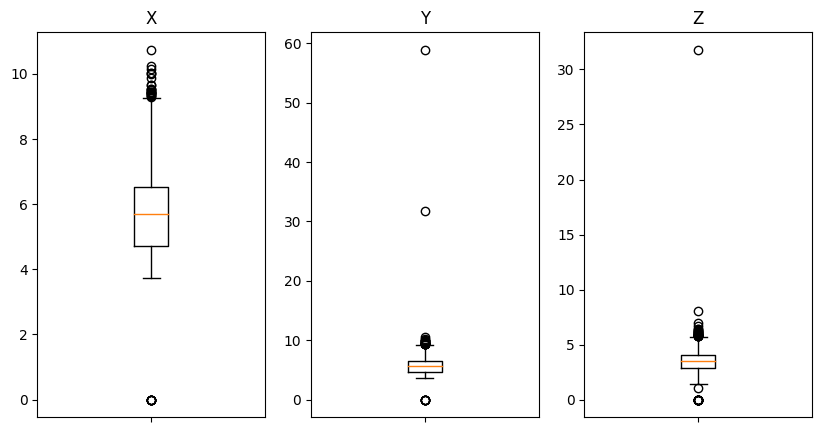

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].boxplot(data['x'])
axs[0].set_title('X')
axs[0].set_xticklabels([])

axs[1].boxplot(data['y'])
axs[1].set_title('Y')
axs[1].set_xticklabels([])

axs[2].boxplot(data['z'])
axs[2].set_title('Z')
axs[2].set_xticklabels([])
plt.savefig('boxplot_xyz.png')

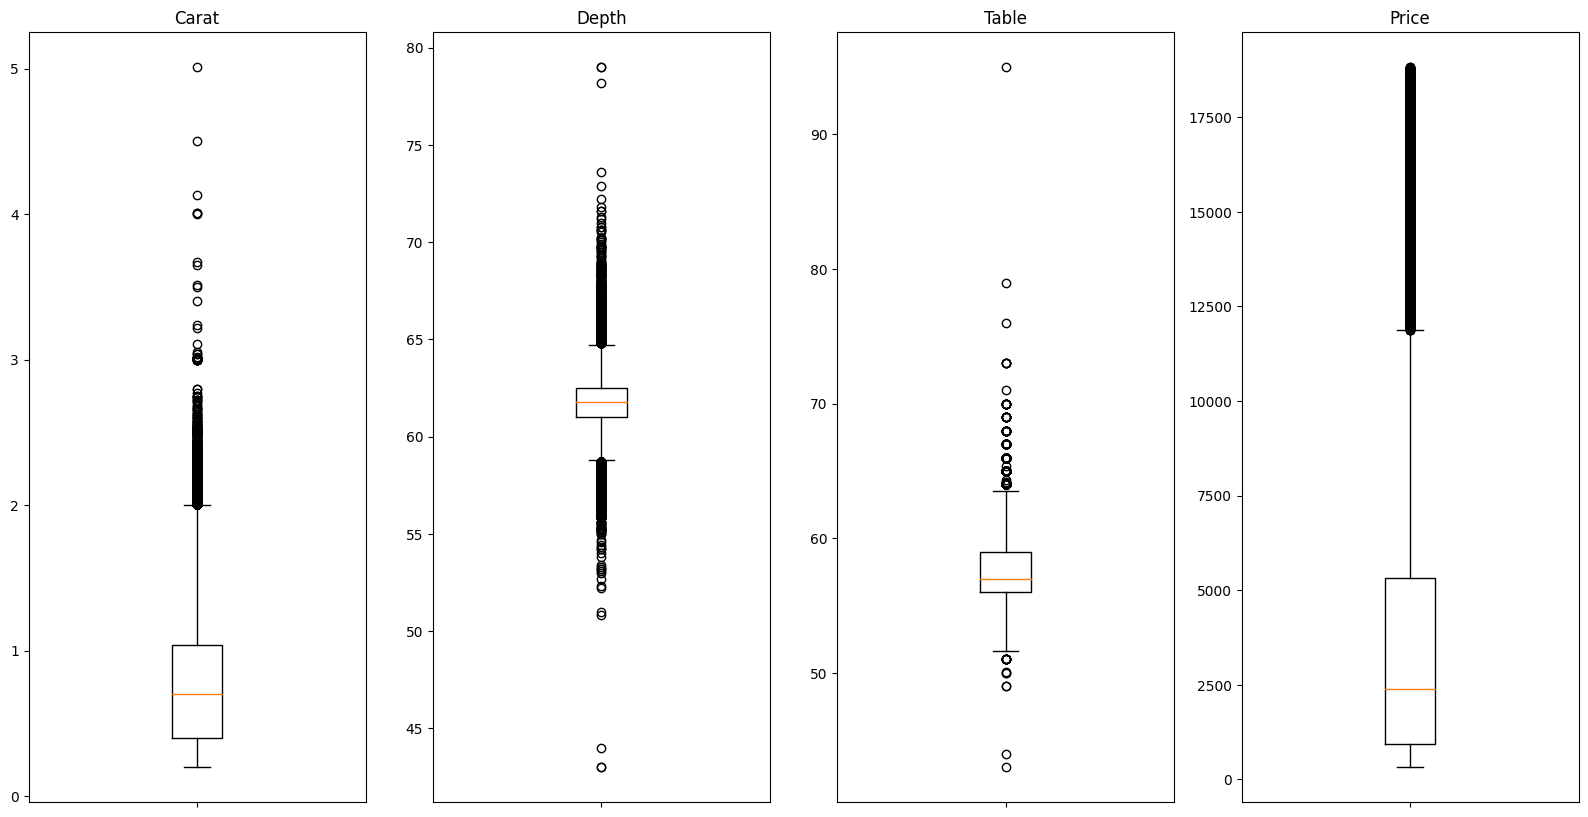

In [45]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10))

axs[0].boxplot(data['carat'])
axs[0].set_title('Carat')
axs[0].set_xticklabels([])

axs[1].boxplot(data['depth'])
axs[1].set_title('Depth')
axs[1].set_xticklabels([])

axs[2].boxplot(data['table'])
axs[2].set_title('Table')
axs[2].set_xticklabels([])

axs[3].boxplot(data['price'])
axs[3].set_title('Price')
axs[3].set_xticklabels([])
plt.savefig('boxplot_other.png')

Next, outliers could be removed

In [43]:
#This function returns a list of indexes of outliers, by calculation IQR
def outliers(ft):
    Q1=data[ft].quantile(0.25)
    Q3=data[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    ls = data.index[(data[ft]<lower_bound) | (data[ft]>upper_bound)]
    return ls

In [44]:
# list of index with outliers for all attributes
index_list = []
for feature in ['carat','depth', 'table', 'price', 'x','y','z']:
    index_list.extend(outliers(feature))
print(f'Total amount of outliers: {len(set(index_list))}')

Total amount of outliers: 6416


In [11]:
#WE DON'T NEED TO DO THIS 
#function which removes outliers from our dataset:
def removed(ls):
    ls = sorted(set(ls))
    data_cleaned = data.drop(ls)
    return data_cleaned

In [12]:
#data = removed(index_list)

In [13]:
#print(f'size of dataframe without outliers: {data.shape}')

## Do the attributes appear to be normal distributed?

In [69]:
#plotting distribution
def plot_histogram(ft):
    fig = plt.figure(figsize =(7, 7))
    plt.hist(data[ft],bins=12)
    plt.show()

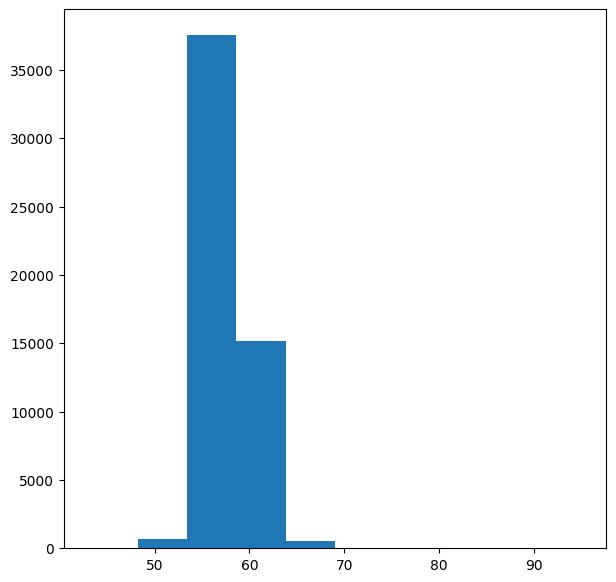

In [68]:
#example histogram of a 'carat' attribute
plot_histogram('table')

'carat' attribute is not normally distributed

Another method to test normality is using formal statistical tests. For example, Shapiro-Wilk test. If p-value of the test is greater than 0.05, data could be assumed to be normally distributed.

In [16]:
from scipy.stats import shapiro 

In [17]:
print("carat:", (shapiro(data['carat'])))
print("depth:", (shapiro(data['depth'])))
print("table:", (shapiro(data['table'])))
print("price:", (shapiro(data['price'])))
print("x:", (shapiro(data['x'])))
print("y:", (shapiro(data['y'])))
print("z:", (shapiro(data['z'])))

carat: ShapiroResult(statistic=0.8938943147659302, pvalue=0.0)
depth: ShapiroResult(statistic=0.9531666040420532, pvalue=0.0)
table: ShapiroResult(statistic=0.9539790153503418, pvalue=0.0)
price: ShapiroResult(statistic=0.798107922077179, pvalue=0.0)
x: ShapiroResult(statistic=0.9565654397010803, pvalue=0.0)
y: ShapiroResult(statistic=0.9186360836029053, pvalue=0.0)
z: ShapiroResult(statistic=0.9338123798370361, pvalue=0.0)


C:\Users\alyon\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-velues for all of the attributes are not greater than 0.05, therefore data is not normally distributed

'table' data is seems to be closest to 'normally distributed'

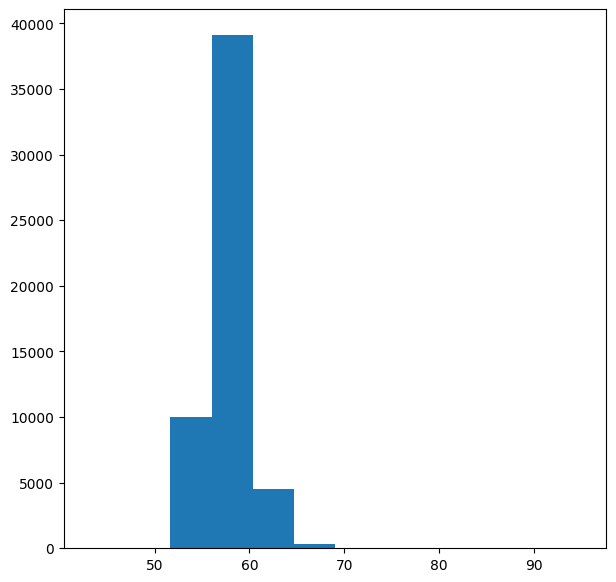

In [18]:
plot_histogram('table')

## Are veriables correlated?

In [25]:
cormat = data.corr(numeric_only = True)
round(cormat,2)

,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,0.95,0.09,0.15,0.86,0.97,0.95,1.00


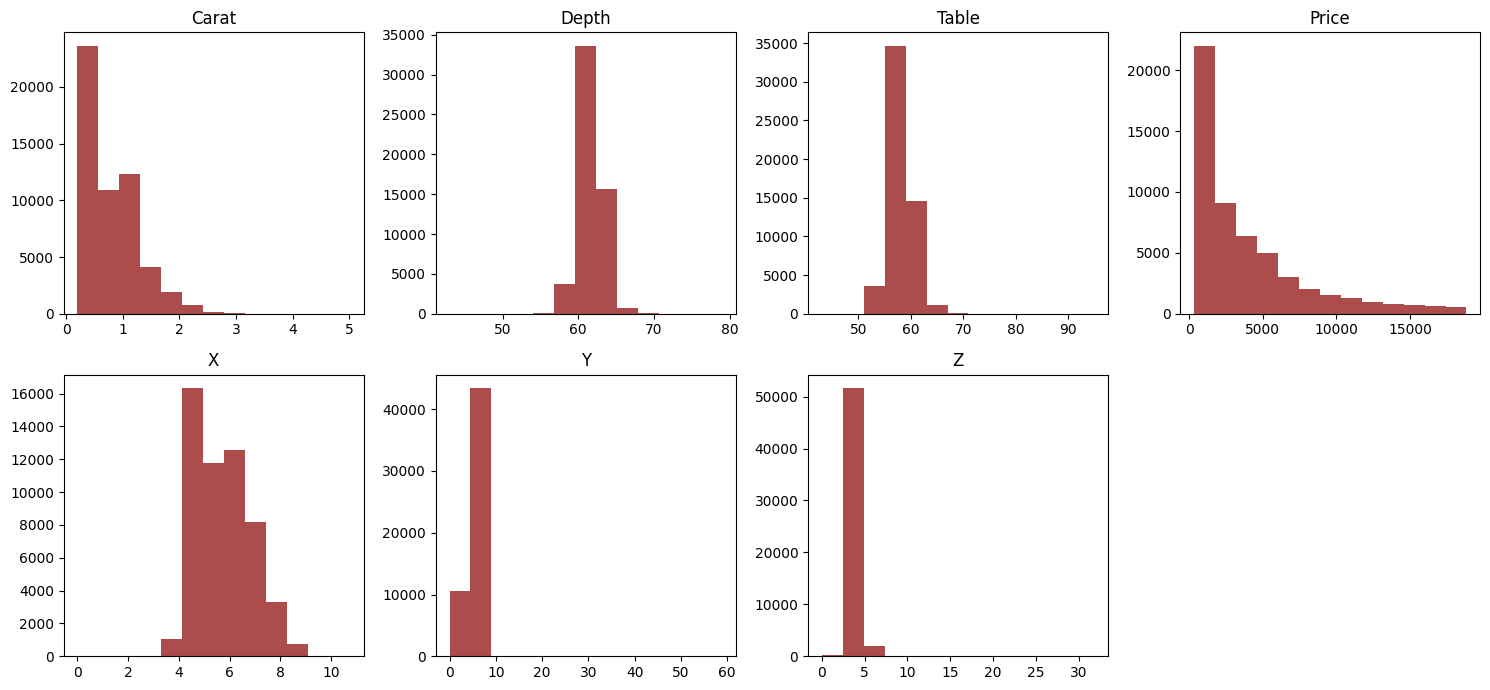

In [62]:
# Sample DataFrame with seven columns of data

selected_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Creating DataFrame from the selected columns
df = pd.DataFrame({col: data[col] for col in selected_columns})

# Number of rows and columns for subplots
nrows = 2
ncols = 4

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 7))

# Flatten the axs array for ease of iteration
axs = axs.flatten()

# Loop through each column and plot its histogram
for i, column in enumerate(df.columns):
    ax = axs[i]  # Select the current subplot
    ax.hist(df[column], bins=13, color='darkred', alpha=0.7)
    ax.set_title(column.capitalize()) # Set the title to the column name
    
# Hide empty subplots if any
for ax in axs[len(df.columns):]:
    ax.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping

plt.savefig('hist_overview.png')
plt.show()

In [77]:
from scipy.stats import normaltest

# Assuming 'data' is your dataset
attributes = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Significance level
alpha = 0.05

# Loop through each attribute
for attribute in attributes:
    # Perform normality test
    statistic, p_value = normaltest(data[attribute])
    
    # Interpret the result
    if p_value > alpha:
        print(f"{attribute.capitalize()}: fail to reject H0")
    else:
        print(f"{attribute.capitalize()}: reject H0")


Carat: reject H0
Depth: reject H0
Table: reject H0
Price: reject H0
X: reject H0
Y: reject H0
Z: reject H0


# Data preporation before conducting PCA
    

## - Creating ordinal categories for the price, which is a dependent variable (target value)

In [364]:
#numerical values of 'price' are transformed into 'price_category', which takes values from 0 to 4
num_categories = 10
max_price = data['price'].max()
custom_bin_edges = np.linspace(0, max_price, num=num_categories + 1)
custom_bin_edges = np.unique(custom_bin_edges)
custom_bin_edges[-1] = np.inf
labels = range(len(custom_bin_edges) - 1)
data['price_category'] = pd.cut(data['price'], bins=custom_bin_edges, labels=labels, include_lowest=True)
print(data['price_category'].value_counts())

0    23328
1    10257
2     7852
3     4176
4     2498
5     1831
6     1344
7     1028
8      883
9      743
Name: price_category, dtype: int64


In [365]:
#Dictionary of the price classes and price intervals
classLabels = data['price_category']
classNames=[]
classDict = {}
C=0
for category, interval in enumerate(pd.cut(data['price'], bins=custom_bin_edges).unique()):
    interval_value = str(interval)
    interval_value = interval_value.replace('(', '').replace('[', '').replace(',', ' -').replace(']', '').replace(')', '')  # Remove parentheses and brackets
    ClassDict[interval_value]=category
    classNames.append(interval_value)
    C=C+1

y = np.asarray(classLabels)
print(classNames)

['0.0 - 1882.3', '1882.3 - 3764.6', '3764.6 - 5646.9', '5646.9 - 7529.2', '7529.2 - 9411.5', '9411.5 - 11293.8', '11293.8 - 13176.1', '13176.1 - 15058.4', '15058.4 - 16940.7', '16940.7 - inf']


In [366]:
x_attributes = [0,1,2,3,4,5,7,8,9]
X = data.iloc[:, x_attributes].values
attributeNames = data.columns[x_attributes].tolist()
X.shape
print(attributeNames)

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']


In [367]:
#Encoding non-numerical ordinal data into integers: 'cut' attribute
cut_values = X[:, 1]
cut_mapping = {
    'Fair': 0,
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4
}
mapping_func = np.vectorize(lambda x: cut_mapping[x])

# Convert ordinal values to numerical values
cut_numerical = mapping_func(cut_values)

# Replace the ordinal values in X[:, 1] with the numerical values
X[:, 1] = cut_numerical

In [368]:
#Encoding non-numerical ordinal data into integers: 'clarity' attribute
clarity_values = X[:,3]
clarity_mapping = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7,
}

mapping_func = np.vectorize(lambda x: clarity_mapping[x])

# Convert ordinal values to numerical values
clarity_numerical = mapping_func(clarity_values)

X[:, 3] = clarity_numerical
X[:, 3]

array([1, 2, 4, ..., 2, 1, 1], dtype=object)

In [369]:
#Encoding non-numerical ordinal data into integers: 'clarity' attribute
color_values = X[:,2]
color_mapping = {
    'D': 0,
    'E': 1,
    'F': 2,
    'G': 3,
    'H': 4,
    'I': 5,
    'J': 6,   
}

mapping_func = np.vectorize(lambda x: color_mapping[x])

# Convert ordinal values to numerical values
color_numerical = mapping_func(color_values)

X[:, 2] = color_numerical
X[:, 2]

array([1, 1, 1, ..., 0, 4, 0], dtype=object)

In [370]:
X.shape

(53940, 9)

In [371]:
N,M = X.shape

In [372]:
X = X.astype(float)

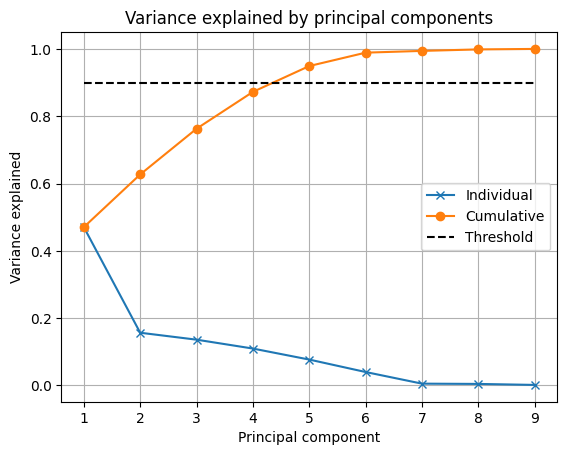

In [373]:
from scipy.linalg import svd

# Subtract the mean from each element in the corresponding column of X
X_mean = np.mean(X, axis=0)

X_std = np.std(X, axis=0)

Y = (X - X_mean)/X_std

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()

# Set custom x-axis tick labels
plt.xticks(range(1, len(rho) + 1), [i for i in range(1, len(rho) + 1)])
plt.savefig('varience_explained.png')
plt.show()

In [374]:
sum(rho[0:5])

0.9491451550112092

Data projected onto the considered principal components

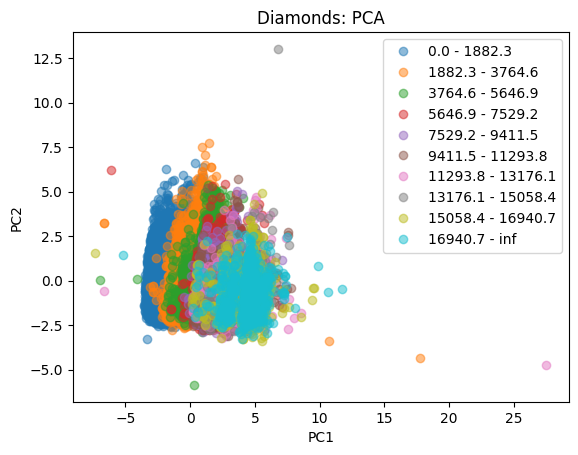

In [387]:
V = Vh.T

# Project the centered data onto principal component space
Z = Y @ V

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = figure()
title("Diamonds: PCA")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
legend(classNames)
xlabel("PC{0}".format(i + 1))
ylabel("PC{0}".format(j + 1))
plt.savefig('pca1_2.png')
# Output result to screen
show()

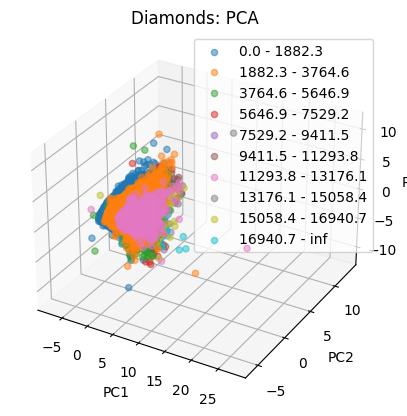

In [388]:
# Indices of the principal components to be plotted
i = 0
j = 1
k = 2  # Add the third principal component

# Plot PCA of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    ax.scatter(Z[class_mask, i], Z[class_mask, j], Z[class_mask, k], label=classNames[c], alpha=0.5)

ax.legend()
ax.set_xlabel("PC{}".format(i + 1))
ax.set_ylabel("PC{}".format(j + 1))
ax.set_zlabel("PC{}".format(k + 1))
plt.title("Diamonds: PCA")
plt.savefig('pca1_2_3.png')
plt.show()


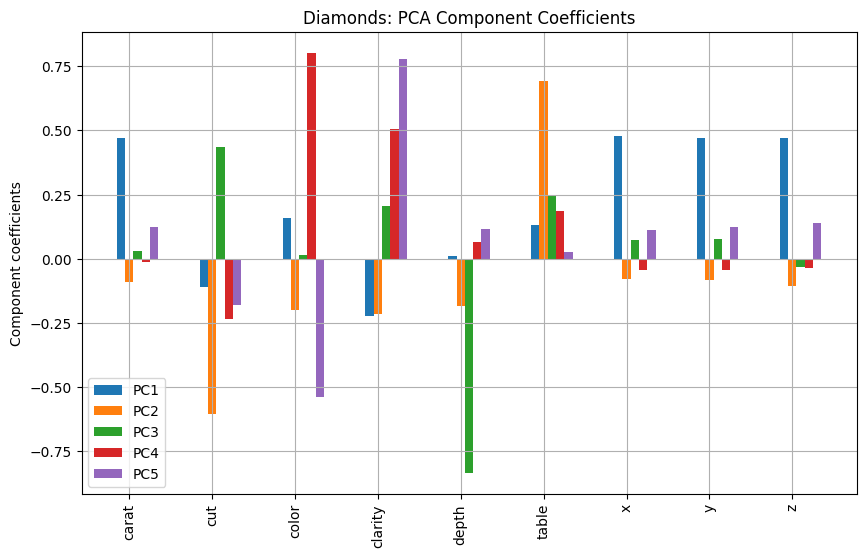

In [376]:

pcs = [0, 1, 2,3,4]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.1
r = np.arange(1, M + 1)

plt.figure(figsize=(10, 6))

for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames, rotation='vertical')
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Diamonds: PCA Component Coefficients")
plt.savefig('PCAComponentCoef.png')
plt.show()


In [377]:
V_matrix = np.round(V[:, :5], decimals=2)
print(V_matrix)

[[ 0.47 -0.09  0.03 -0.01  0.12]
 [-0.11 -0.61  0.44 -0.23 -0.18]
 [ 0.16 -0.2   0.02  0.8  -0.54]
 [-0.22 -0.21  0.21  0.51  0.78]
 [ 0.01 -0.19 -0.83  0.07  0.12]
 [ 0.13  0.69  0.24  0.18  0.02]
 [ 0.48 -0.08  0.07 -0.04  0.11]
 [ 0.47 -0.08  0.08 -0.05  0.12]
 [ 0.47 -0.1  -0.03 -0.04  0.14]]


In [378]:
S_matrix = np.round(S[:5], decimals=2)
print(S_matrix)

[477.87 275.67 256.87 230.58 193.06]


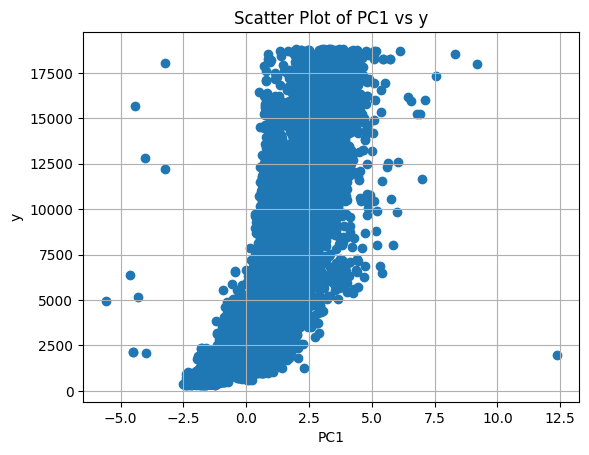

In [385]:
y_num =data['price']
PC1_values = np.dot(Y, V[0])

import matplotlib.pyplot as plt

# Assuming PC1_values and y_values are your arrays of PC1 values and y values respectively

plt.scatter(PC1_values, y_num)
plt.xlabel('PC1')
plt.ylabel('y')
plt.title('Scatter Plot of PC1 vs y')
plt.grid(True)
plt.show()